In [1]:
import sys
import numpy as np
from numpy.linalg import inv

sys.path.append('../')

import data_generation

Here we define our first parameters:

- N: Total number of observations, for example, it could be the number of rows of a dataframe

- d: Number of features that we consider (no multicolinearity is supposed and ensured when generating the covariance matrix)

- T: Number of periods (we divide our observations on equally sized periods)

The idea is to generate synthetic data for us to be able to test the model afterwards. 

We came up with the idea of generating a vector of size d using a normal joint gaussian distribution with mean 0 and variance matrix Sigma. 

We construct Sigma such that it is positive definite. 

We use Sigma for a period of size N//T and then construct another Sigma. We repeat this to construct the dataframe.

In [2]:
N = 1000   
d = 5      
T = 10    

df, covariances = data_generation.generate_time_varying_gaussian_data(N, d, T)

In [3]:
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,0.350027,-0.749546,-2.571162,-1.161523,-5.643275
1,1.394830,-2.532252,-1.946152,-0.296510,-0.335807
2,2.998961,-0.447919,-3.489940,-3.077500,3.747736
3,3.677362,-2.651009,-3.987965,-1.665047,-0.424290
4,-3.101065,2.350127,4.582066,2.009889,1.010079


Covariance matrix of the first period

In [4]:
covariances[0]

array([[ 3.05979016, -0.67965499, -2.51916374, -0.98797549, -1.23950244],
       [-0.67965499,  3.65246689, -0.47892836, -1.56662479, -0.27436542],
       [-2.51916374, -0.47892836,  7.12618873,  4.98172794,  3.10724048],
       [-0.98797549, -1.56662479,  4.98172794,  4.259855  ,  1.48831719],
       [-1.23950244, -0.27436542,  3.10724048,  1.48831719,  4.52992126]])

Check that eigen values are positive

In [5]:
np.linalg.eigvals(covariances[0])

array([13.29471652,  4.58313201,  0.05094072,  1.68383256,  3.01560023])

Here we check the evolution of the covariance matrix over time using heatmaps

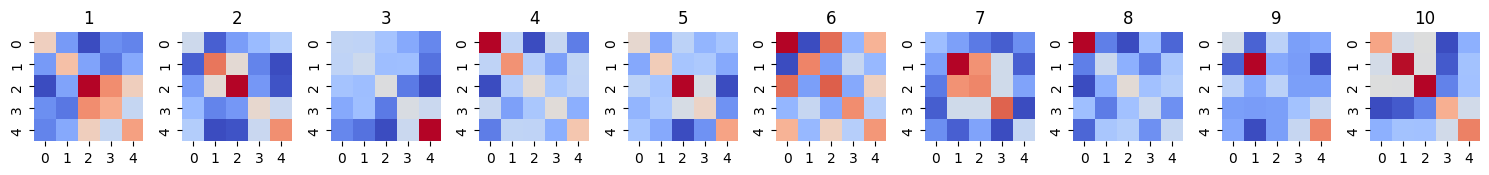

In [6]:
data_generation.plot_heatmaps(covariances)


Here we simplify the problem a little and consider a artificial case where :

- t<t_shift the covariance matrix is equal to Sigma_0

- t==t_shift the covarinace matrix changes brutally

- t>t_shift the covariance matrix is equal to Sigma_0

The idea is to use the Sigma of each period to generate the dataframe. Our first goal is to do graph inference with the tgvl to detect this shift.

In [7]:
N = 1000  
d = 6      
T = 10     
t_shift = 5  
delta = 0.8  

data, covariances = data_generation.generate_time_varying_gaussian_data_with_perturbation(N, d, T, t_shift, delta)


/Users/alaabouattour/Desktop/TVGL/Examples/../data_generation.py:118: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, covariance, samples_per_period)


As we can see the shift happens at time t_shift=6

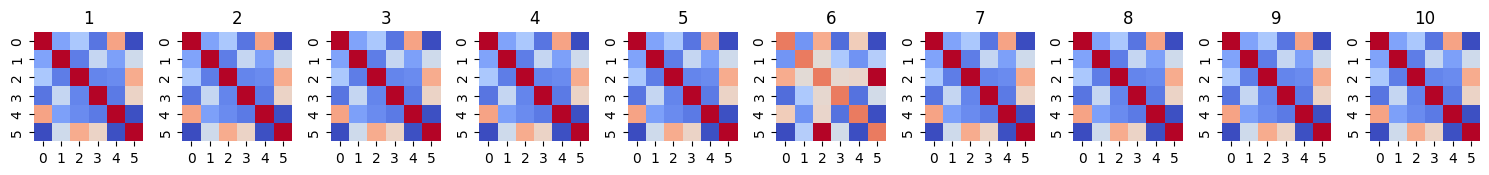

In [8]:
data_generation.plot_heatmaps(covariances)

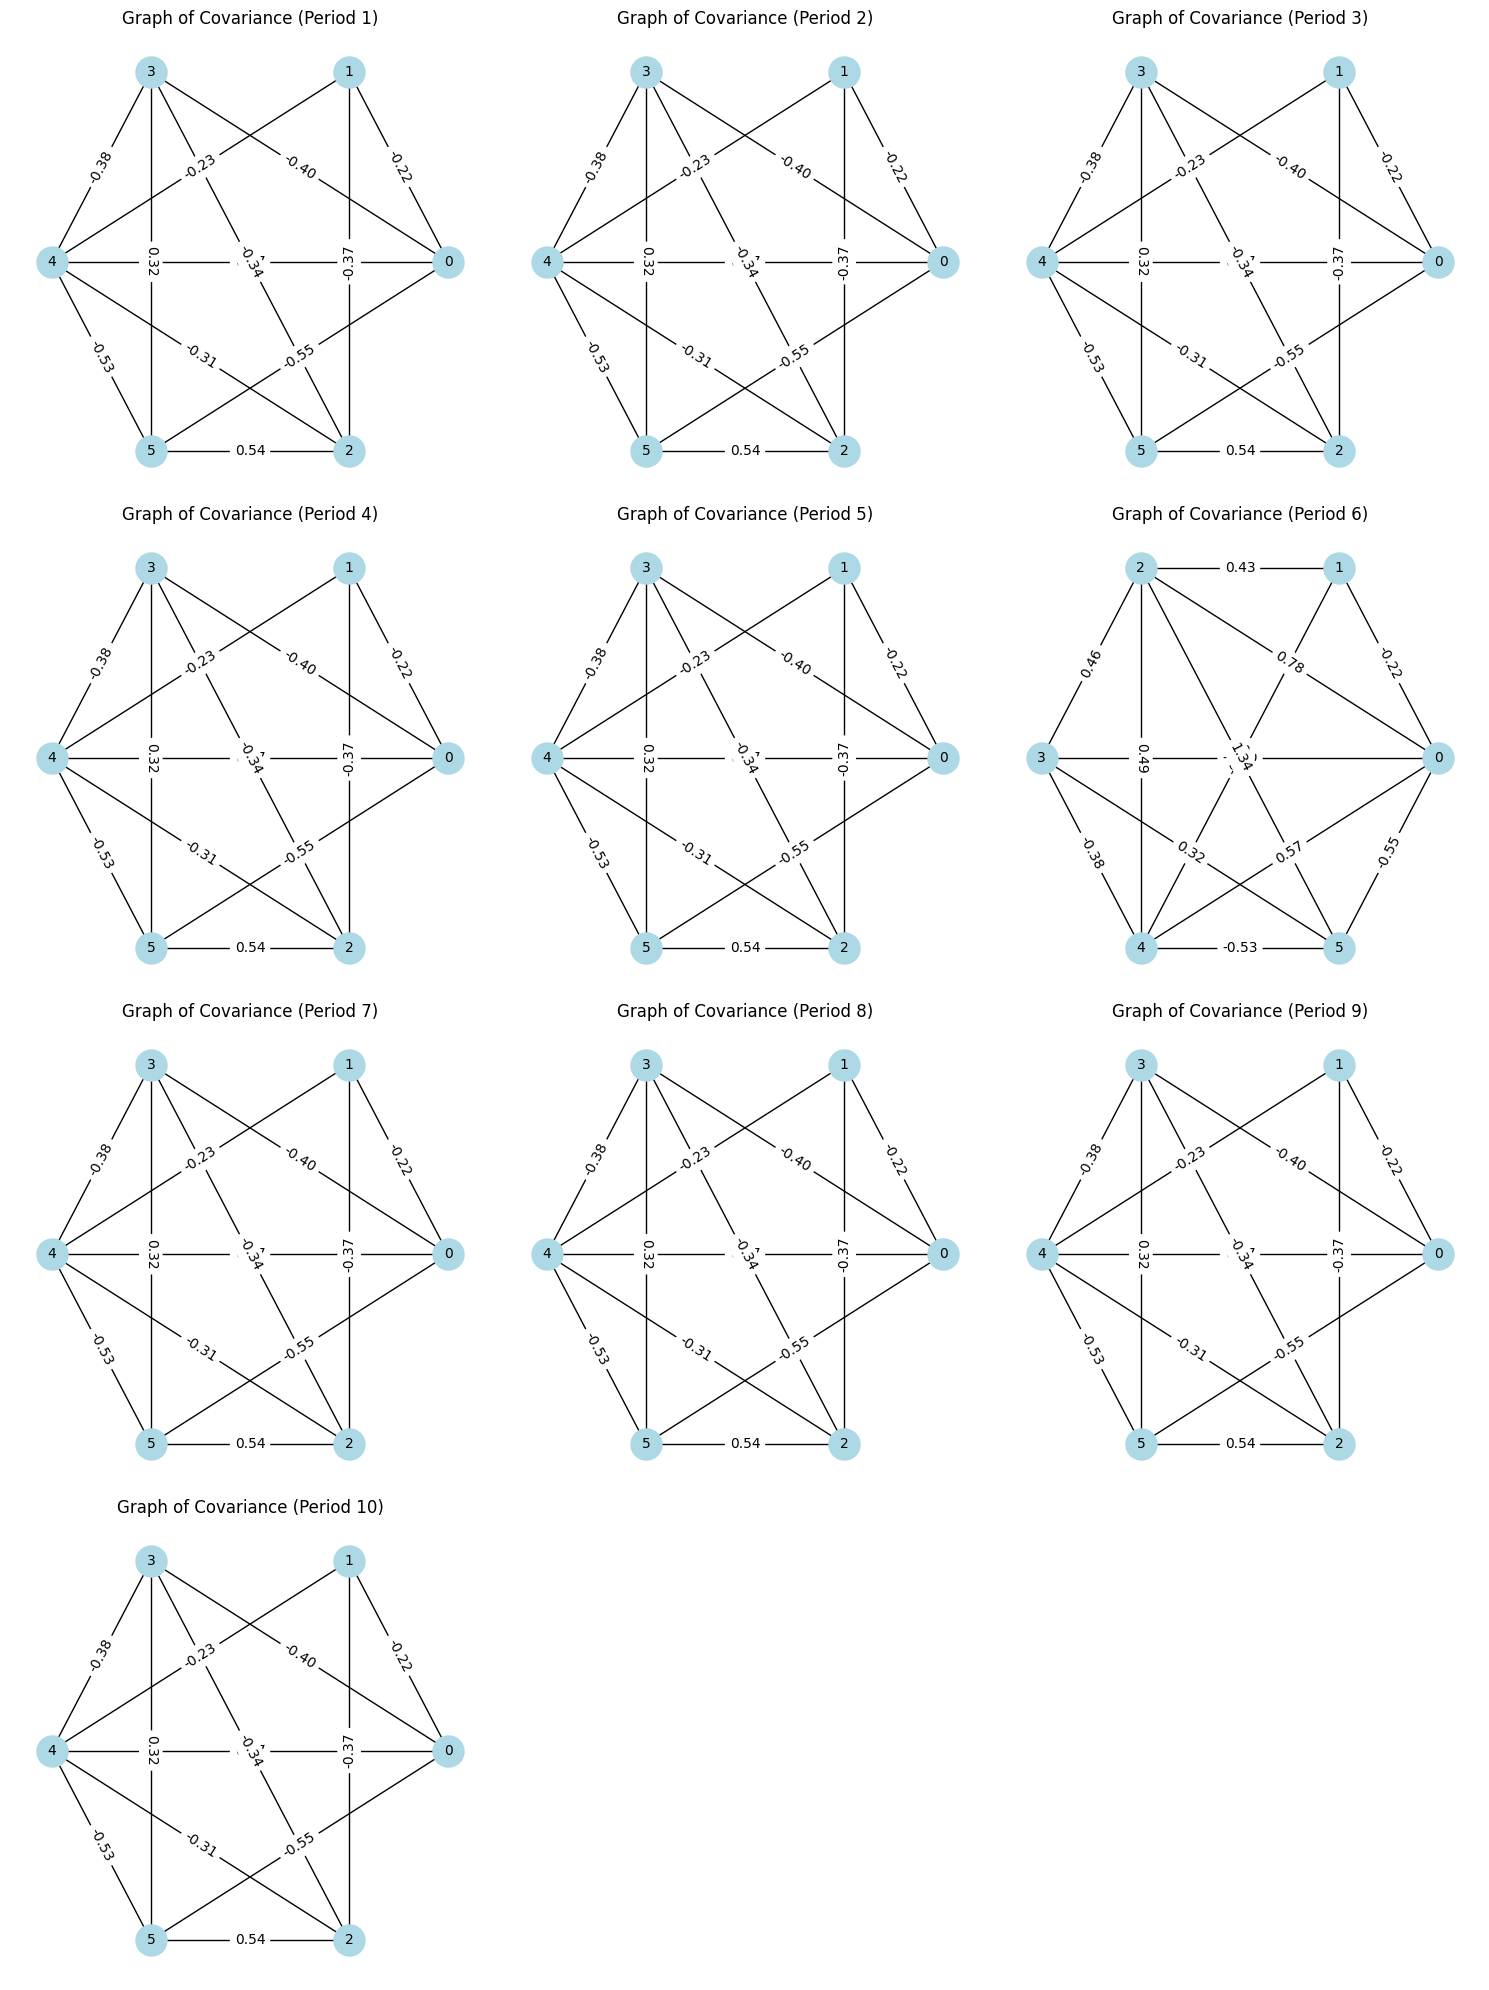

In [9]:
data_generation.plot_graph(covariances, threshold=0.2)


We understood that the interpretation of the covariance matrix is not as interesting as the interpretation of its inverse. So let's check that instead.

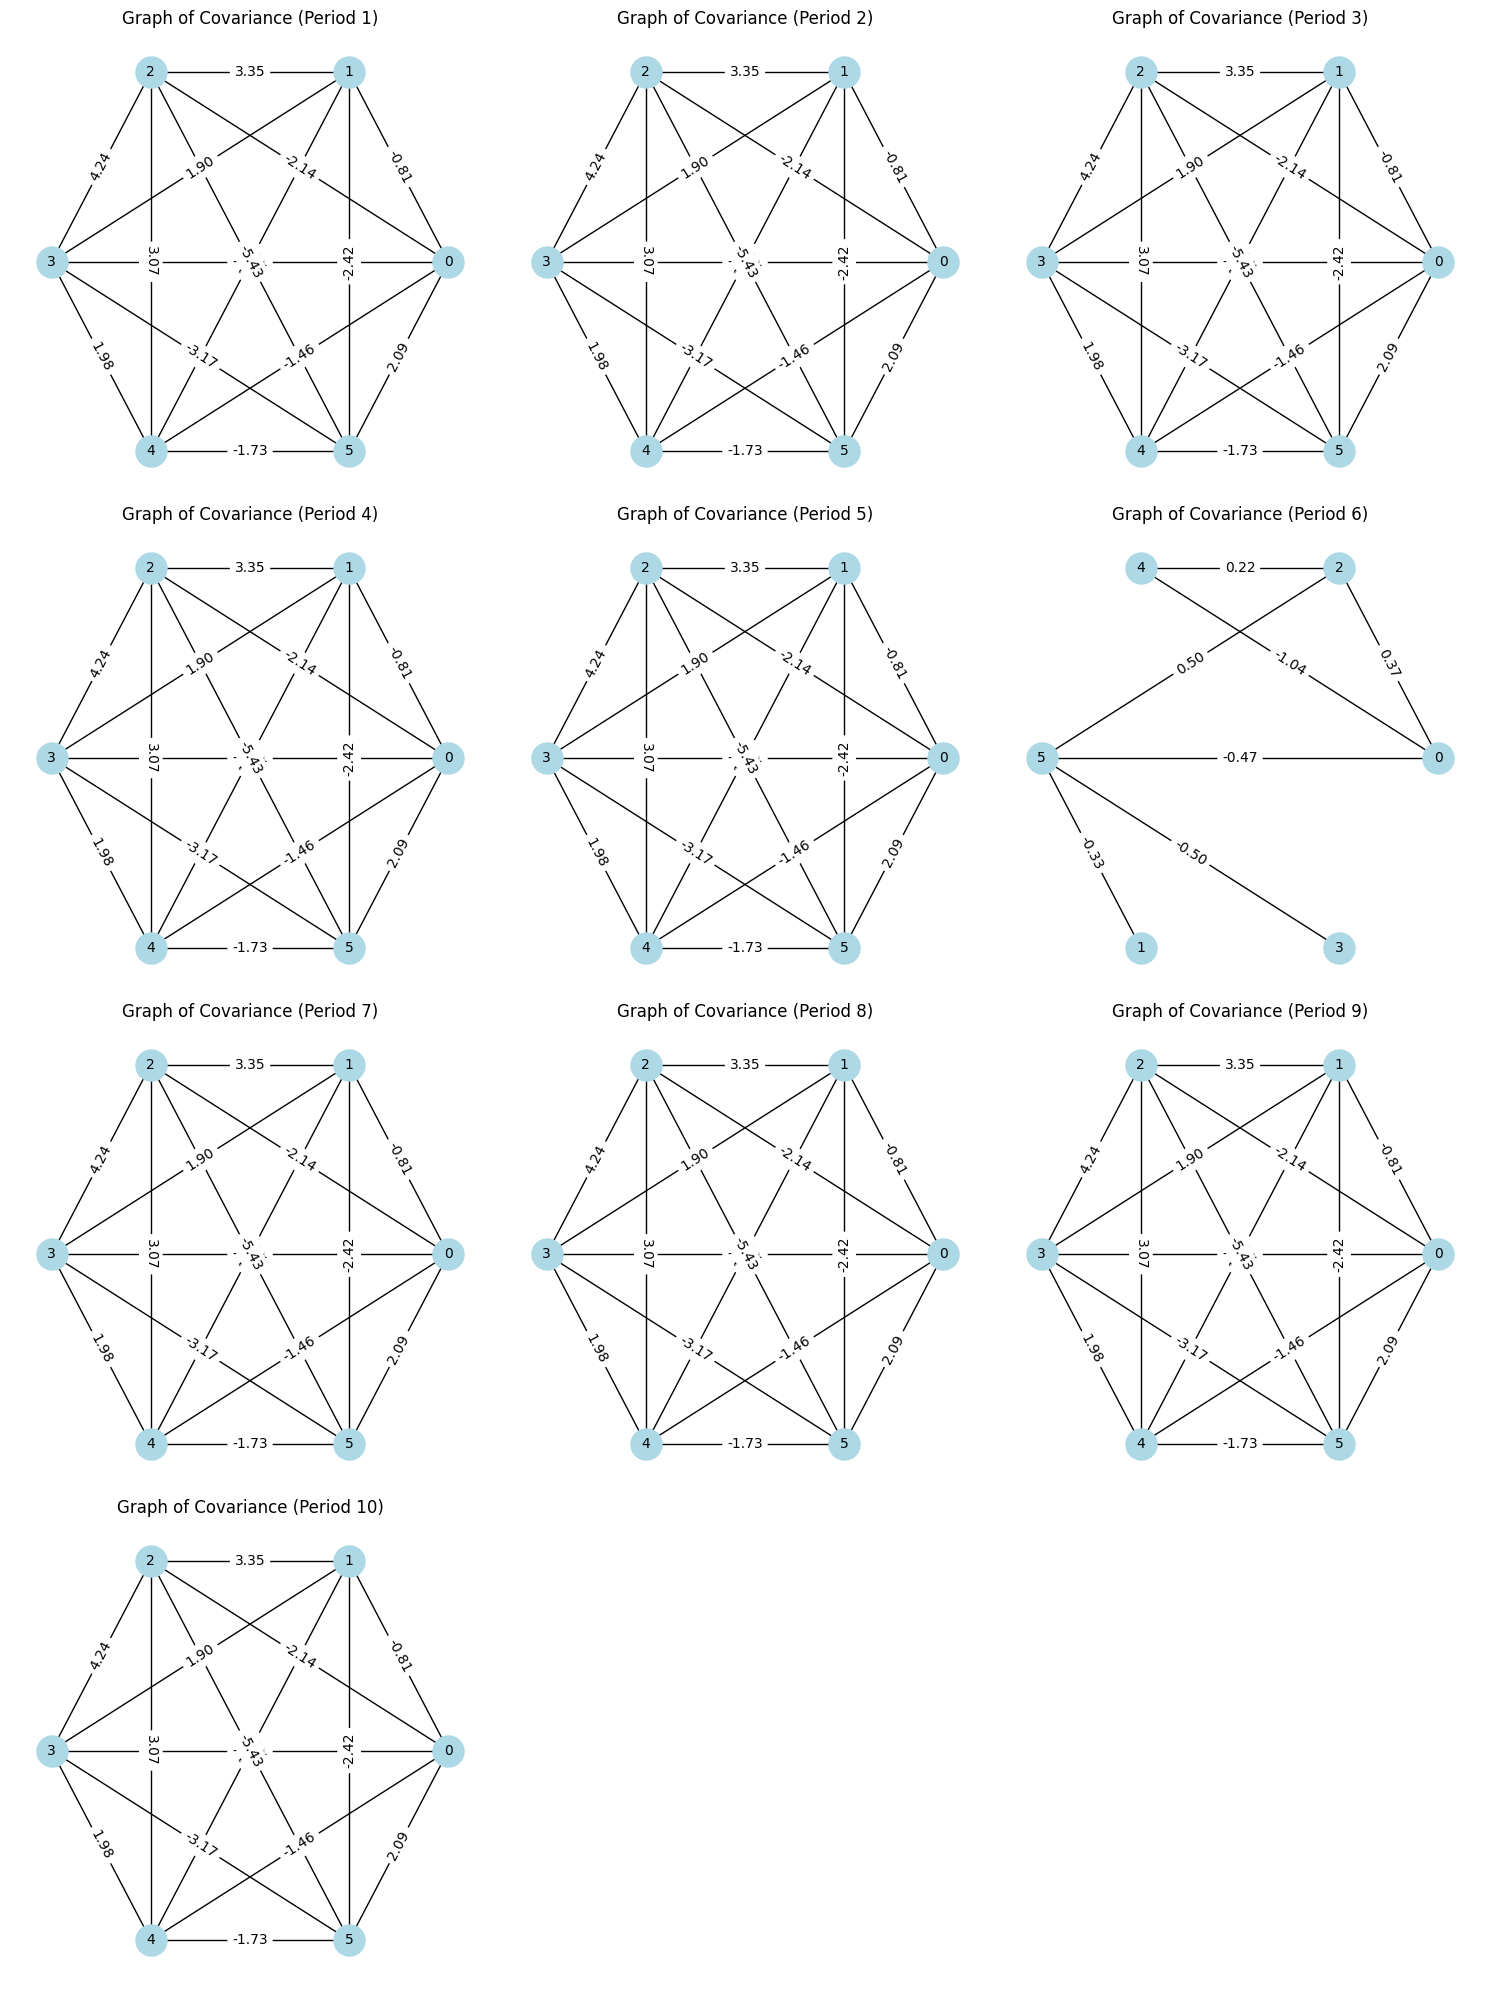

In [10]:
inverse_covariances = [inv(cov) for cov in covariances]
data_generation.plot_graph(inverse_covariances, threshold=0.2)

In [12]:
data.to_csv('Examples_data/perturbation.csv')

In [2]:
covariances

NameError: name 'covariances' is not defined